## Series

A one-dimensional array of **indexed** data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [2]:
# Create a numpy array
input_array = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
input_array

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [3]:
# Slice the first three elements
input_array[0:3]

array([0.2, 0.4, 0.6])

In [4]:
# Make a Series from array
data = pd.Series(input_array)
data

0    0.2
1    0.4
2    0.6
3    0.8
4    1.0
dtype: float64

In [5]:
# Slice first three elements
data[0:3]

0    0.2
1    0.4
2    0.6
dtype: float64

In [6]:
# Explicit index
data = pd.Series(input_array, index=['a','b','c','d','e'])
data

a    0.2
b    0.4
c    0.6
d    0.8
e    1.0
dtype: float64

In [7]:
# We can access an element by an index
data['b']

0.4

In [8]:
# We can also slice by the index
data[:'c']

a    0.2
b    0.4
c    0.6
dtype: float64

We can also 

In [9]:
animal_types = ['cats', 'dogs', 'guinea pigs', 'birds', 'other']
num_rescued = np.random.randint(0, 100, 5)

In [10]:
animals = pd.Series(num_rescued, index=animal_types)
animals

cats           23
dogs           39
guinea pigs    37
birds          25
other           7
dtype: int64

In [11]:
# Select the rows that match the maximum value (probably only one)
animals[animals == animals.max()]

dogs    39
dtype: int64

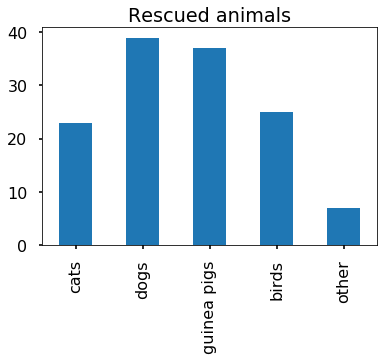

In [12]:
# Make a bar plot
animals.plot(kind='bar', title='Rescued animals')

## DataFrames

A `DataFrame` is a collection of `Series`;

The DataFrame is the way Pandas represents a table, and Series is the data-structure
Pandas use to represent a column.

Pandas is built on top of the `numpy` library, which in practice means that
most of the methods defined for Numpy Arrays apply to Pandas Series/DataFrames.

What makes Pandas so attractive is the powerful interface to access individual records
of the table, proper handling of missing values, and relational-databases operations
between DataFrames.

## Selecting values

To access a value at the position `[i,j]` of a DataFrame, we have two options, depending on
what is the meaning of `i` in use.
Remember that a DataFrame provides a *index* as a way to identify the rows of the table;
a row, then, has a *position* inside the table as well as a *label*, which
uniquely identifies its *entry* in the DataFrame.

## Use `DataFrame.iloc[..., ...]` to select values by their (entry) position

*   Can specify location by numerical index analogously to 2D version of character selection in strings.

In [13]:
data_fn = '../data/tasmania-births-1850-1859.csv.bz2'
data = pd.read_csv(data_fn, index_col='NI_REG_PLACE')

In [14]:
# Show the top records
data.head()

,NI_BIRTH_DATE,NI_BIRTH_DATE.1,NI_GENDER,NI_NAME_FACET,NI_MOTHER,NI_FATHER,NI_REG_YEAR
NI_REG_PLACE,,,,,,,
Hobart,1850-01-26,26 Jan 1850,Female,"Burgess, Sarah","Foreman, Elizabeth","Burgess, John",1850
Hobart,1850-01-02,02 Jan 1850,Male,"Barnett, Robert","Griffin, Margaret","Barnett, William",1850
Hobart,1850-01-02,02 Jan 1850,Male,"Hinsby, Frederick Henry Ware","Ware, Lucy","Hinsby, Henry",1850
Hobart,1850-01-10,10 Jan 1850,Male,"Quested, Given Name Not Recorded","Mcnamarra, Ann","Quested, James",1850
Hobart,1850-01-10,10 Jan 1850,Female,"Rowlands, Given Name Not Recorded","Jones, Virtue","Rowlands, Martin",1850


In [15]:
# Display the third record (index position 2 from 0)
print(data.iloc[2])

NI_BIRTH_DATE                        1850-01-02
NI_BIRTH_DATE.1                     02 Jan 1850
NI_GENDER                                  Male
NI_NAME_FACET      Hinsby, Frederick Henry Ware
NI_MOTHER                            Ware, Lucy
NI_FATHER                         Hinsby, Henry
NI_REG_YEAR                                1850
Name: Hobart, dtype: object


## Use `DataFrame.loc[..., ...]` to select values by their (entry) label.

*   Can specify location by row name analogously to 2D version of dictionary keys.

In [16]:
# Show the mother columns for all the matches for exactly Jan 01, 1791
data.loc["Launceston", "NI_MOTHER"].head(10)

NI_REG_PLACE
Launceston             Holaday, Mary
Launceston        Flaxman, Ann Eliza
Launceston        Everett, Catherine
Launceston         Mansfield, Phoebe
Launceston        Mcdonald, Margaret
Launceston             Delorkin, Ann
Launceston              Foster, Jane
Launceston            Doran, Bridget
Launceston          Moore, Sarah Ann
Launceston    Lane, Catherine Louisa
Name: NI_MOTHER, dtype: object

## Use `:` on its own to mean all columns or all rows.

*   Just like Python's usual slicing notation.

In [17]:
# Get all the columns for a certain date
data.loc['Launceston', :].head(2)

,NI_BIRTH_DATE,NI_BIRTH_DATE.1,NI_GENDER,NI_NAME_FACET,NI_MOTHER,NI_FATHER,NI_REG_YEAR
NI_REG_PLACE,,,,,,,
Launceston,1852-12-03,03 Dec 1852,Male,"Taylor, William Joseph","Holaday, Mary","Taylor, Edward",1853
Launceston,1852-12-31,31 Dec 1852,Male,"Wood, Louis Wm De-gouge","Flaxman, Ann Eliza","Wood, Louis",1853


*   Would get the same result printing `data.loc["Launceston"]` (without a second index).

In [18]:
# Could also just do
data.loc['Launceston'].head(2)

,NI_BIRTH_DATE,NI_BIRTH_DATE.1,NI_GENDER,NI_NAME_FACET,NI_MOTHER,NI_FATHER,NI_REG_YEAR
NI_REG_PLACE,,,,,,,
Launceston,1852-12-03,03 Dec 1852,Male,"Taylor, William Joseph","Holaday, Mary","Taylor, Edward",1853
Launceston,1852-12-31,31 Dec 1852,Male,"Wood, Louis Wm De-gouge","Flaxman, Ann Eliza","Wood, Louis",1853


## Select multiple columns or rows using `DataFrame.loc` and a named slice.

In [19]:
data.loc['Launceston', 'NI_NAME_FACET':'NI_FATHER'].head(3)

,NI_NAME_FACET,NI_MOTHER,NI_FATHER
NI_REG_PLACE,,,
Launceston,"Taylor, William Joseph","Holaday, Mary","Taylor, Edward"
Launceston,"Wood, Louis Wm De-gouge","Flaxman, Ann Eliza","Wood, Louis"
Launceston,"Evans, John","Everett, Catherine","Evans, George"


In the above code, we discover that **slicing using `loc` is inclusive at both
ends**, which differs from **slicing using `iloc`**, where slicing indicates
everything up to but not including the final index. 


## Use comparisons to select data based on value.

*   Comparison is applied element by element.
*   Returns a similarly-shaped dataframe of `True` and `False`.

In [20]:
# Use a subset of data to keep work clean
town_reg_data = data.loc[:, 'NI_REG_YEAR']
town_reg_data.value_counts()

1857    3419
1859    3415
1858    3326
1856    3151
1855    3139
1854    2811
1853    2366
1851    2260
1852    2247
1850    1959
1860     289
1862      11
1861       8
1871       4
1863       4
1867       2
1866       2
1880       1
1878       1
1868       1
1869       1
1873       1
1870       1
1903       1
Name: NI_REG_YEAR, dtype: int64

In [21]:
# Show a bool Series that match 
late_reg_year = town_reg_data > 1860
late_reg_year.head()

NI_REG_PLACE
Hobart    False
Hobart    False
Hobart    False
Hobart    False
Hobart    False
Name: NI_REG_YEAR, dtype: bool

## Select values or NaN using a Boolean mask.

*   A frame full of Booleans is sometimes called a *mask* because of how it can be used.

In [22]:
# Show all the data for the late reg years
data.loc[late_reg_year].head()

,NI_BIRTH_DATE,NI_BIRTH_DATE.1,NI_GENDER,NI_NAME_FACET,NI_MOTHER,NI_FATHER,NI_REG_YEAR
NI_REG_PLACE,,,,,,,
Launceston,1851-09-20,20 Sep 1851,Female,"Tregurtha, Julia Sophia","Tregurtha, Elizabeth","Tregurtha, Edward Primrose",1862
Launceston,1859-11-20,20 Nov 1859,Female,"Molloy, Rebecca Eliza","Molloy, Ann","Molloy, Henry",1862
Launceston,1858-08-05,05 Aug 1858,Female,"Carter, Mary Ann","Carter, Margaret","Carter, Robert",1862
Launceston,1859-12-26,26 Dec 1859,Male,"Carter, Robert","Carter, Margaret","Carter, Robert",1862
Launceston,1859-03-06,06 Mar 1859,Female,"Styles, Sarah","Styles, Maria","Styles, Benjamin",1862


## Query for values

In [23]:
# Try to make the query method work similar to above
data.query?

Signature: data.query(expr, inplace=False, **kwargs)
Docstring:
Query the columns of a DataFrame with a boolean expression.

Parameters
----------
expr : string
    The query string to evaluate.  You can refer to variables
    in the environment by prefixing them with an '@' character like
    ``@a + b``.
inplace : bool
    Whether the query should modify the data in place or return
    a modified copy

    .. versionadded:: 0.18.0

kwargs : dict
    See the documentation for :func:`pandas.eval` for complete details
    on the keyword arguments accepted by :meth:`DataFrame.query`.

Returns
-------
q : DataFrame

See Also
--------
pandas.eval
DataFrame.eval

Notes
-----
The result of the evaluation of this expression is first passed to
:attr:`DataFrame.loc` and if that fails because of a
multidimensional key (e.g., a DataFrame) then the result will be passed
to :meth:`DataFrame.__getitem__`.

This method uses the top-level :func:`pandas.eval` function to
evaluate the passed query.

The 

## 

In [24]:
# Add one-hot columns for male and female
data.loc[data.NI_GENDER == 'Male', 'Male'] = 1
data.loc[data.NI_GENDER == 'Female', 'Female'] = 1

Let's take a look at the values and notice how the empty values were populated

In [25]:
data.head(2)

,NI_BIRTH_DATE,NI_BIRTH_DATE.1,NI_GENDER,NI_NAME_FACET,NI_MOTHER,NI_FATHER,NI_REG_YEAR,Male,Female
NI_REG_PLACE,,,,,,,,,
Hobart,1850-01-26,26 Jan 1850,Female,"Burgess, Sarah","Foreman, Elizabeth","Burgess, John",1850,NaN,1.0
Hobart,1850-01-02,02 Jan 1850,Male,"Barnett, Robert","Griffin, Margaret","Barnett, William",1850,1.0,NaN


We want numerical values so we can easily use `fillna(0)`:

In [26]:
data.fillna(0).head(2)

,NI_BIRTH_DATE,NI_BIRTH_DATE.1,NI_GENDER,NI_NAME_FACET,NI_MOTHER,NI_FATHER,NI_REG_YEAR,Male,Female
NI_REG_PLACE,,,,,,,,,
Hobart,1850-01-26,26 Jan 1850,Female,"Burgess, Sarah","Foreman, Elizabeth","Burgess, John",1850,0.0,1.0
Hobart,1850-01-02,02 Jan 1850,Male,"Barnett, Robert","Griffin, Margaret","Barnett, William",1850,1.0,0.0


In [27]:
gender_data = data.loc[:, 'Male':'Female'].fillna(0)
gender_data.head()

,Male,Female
NI_REG_PLACE,,
Hobart,0.0,1.0
Hobart,1.0,0.0
Hobart,1.0,0.0
Hobart,1.0,0.0
Hobart,0.0,1.0


In [77]:
# Get the male/female count by city
gender_data.groupby('NI_REG_PLACE').sum()

,Male,Female
NI_REG_PLACE,,
Bothwell,206.0,196.0
Brighton,328.0,372.0
Campbell Town,423.0,392.0
Clarence,182.0,174.0
Deloraine,209.0,179.0
Emu Bay,43.0,47.0
Esperance,10.0,11.0
Evandale,33.0,33.0
Fingal,214.0,190.0


### Questions:
- "How can I do statistical analysis of tabular data?"

### Objectives:
- "Select individual values from a Pandas dataframe."
- "Select entire rows or entire columns from a dataframe."
- "Select a subset of both rows and columns from a dataframe in a single operation."
- "Select a subset of a dataframe by a single Boolean criterion."

### Keypoints:
- "Use `DataFrame.iloc[..., ...]` to select values by integer location."
- "Use `:` on its own to mean all columns or all rows."
- "Select multiple columns or rows using `DataFrame.loc` and a named slice."
- "Result of slicing can be used in further operations."
- "Use comparisons to select data based on value."
- "Select values or NaN using a Boolean mask."

## References

### Software Carpentry
* [DataFrames](http://swcarpentry.github.io/python-novice-gapminder/08-data-frames/)

### Other
* [Introducting Pandas Objects](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)